<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [1]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [2]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


--2025-09-12 04:48:19--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  61.7MB/s    in 2.5s    

2025-09-12 04:48:22 (61.7 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


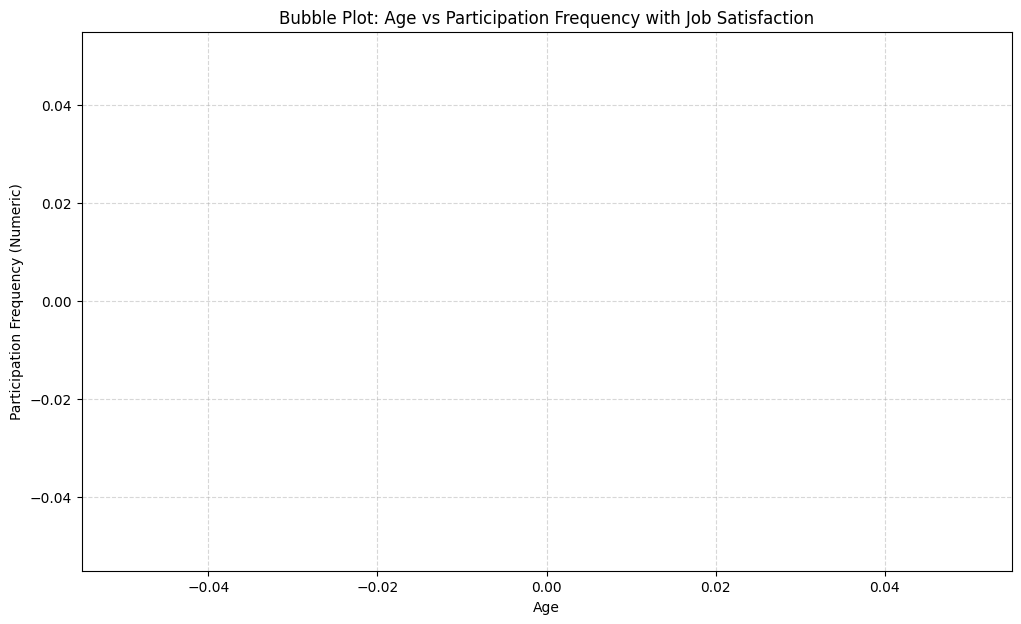

In [3]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query relevant columns
QUERY = """
SELECT Age, SOPartFreq, JobSat
FROM main
WHERE Age IS NOT NULL
  AND SOPartFreq IS NOT NULL
  AND JobSat IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Close the connection
conn.close()

# Convert JobSat to numeric (for bubble size)
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')
df = df.dropna(subset=['JobSat'])

# Map participation frequency to numeric values if categorical
freq_mapping = {
    'Never': 0,
    'Less than once per year': 1,
    'Once per year': 2,
    'A few times per year': 3,
    'Once per month': 4,
    'A few times per month': 5,
    'Once per week': 6,
    'Multiple times per week': 7,
    'Daily': 8
}
df['SOPartFreqNumeric'] = df['SOPartFreq'].map(freq_mapping)

# Remove rows with unmapped frequencies
df = df.dropna(subset=['SOPartFreqNumeric'])

# Create bubble plot
plt.figure(figsize=(12,7))
plt.scatter(
    df['Age'], 
    df['SOPartFreqNumeric'], 
    s=df['JobSat']*20,  # Bubble size proportional to JobSat
    alpha=0.6, 
    color='teal',
    edgecolors='w'
)

plt.title("Bubble Plot: Age vs Participation Frequency with Job Satisfaction")
plt.xlabel("Age")
plt.ylabel("Participation Frequency (Numeric)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


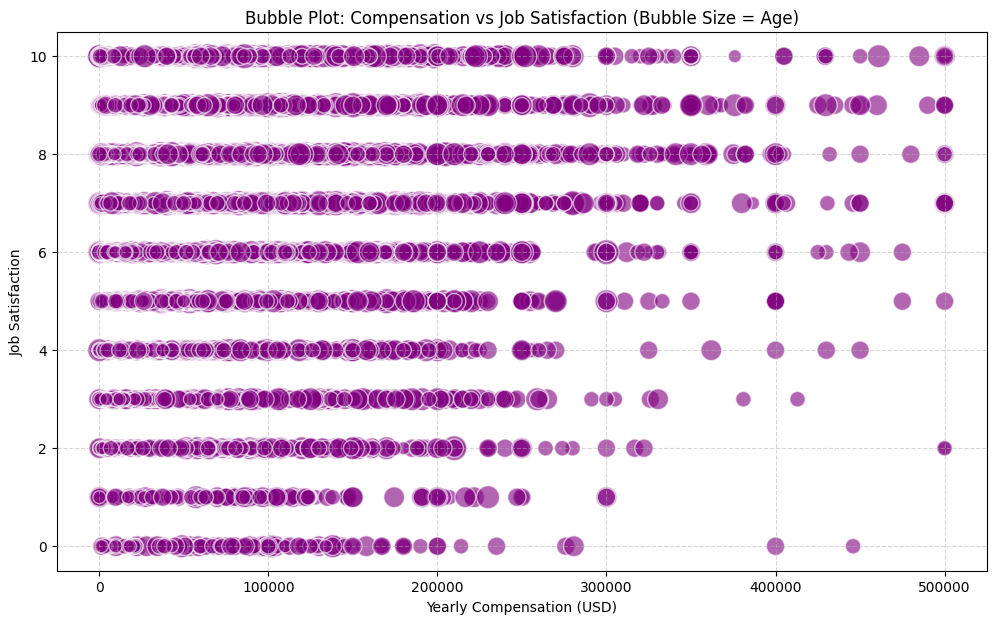

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query relevant columns
QUERY = """
SELECT ConvertedCompYearly, JobSat, Age
FROM main
WHERE ConvertedCompYearly IS NOT NULL
  AND JobSat IS NOT NULL
  AND Age IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Close the connection
conn.close()

# Convert numeric columns
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')

# Remove rows with invalid numeric values
df = df.dropna(subset=['ConvertedCompYearly', 'JobSat'])

# Convert Age to numeric (extract lower bound of age ranges)
def age_to_numeric(age_str):
    try:
        if 'Under' in age_str:
            return 17
        elif 'or older' in age_str:
            return int(age_str.split()[0])
        elif '-' in age_str:
            return int(age_str.split('-')[0])
        else:
            return None
    except:
        return None

df['AgeNumeric'] = df['Age'].apply(age_to_numeric)
df = df.dropna(subset=['AgeNumeric'])

# Remove extreme outliers for compensation
df = df[df['ConvertedCompYearly'] <= 500000]

# Create bubble plot
plt.figure(figsize=(12,7))
plt.scatter(
    df['ConvertedCompYearly'], 
    df['JobSat'], 
    s=df['AgeNumeric']*5,  # Bubble size proportional to Age
    alpha=0.6, 
    color='purple',
    edgecolors='w'
)

plt.title("Bubble Plot: Compensation vs Job Satisfaction (Bubble Size = Age)")
plt.xlabel("Yearly Compensation (USD)")
plt.ylabel("Job Satisfaction")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



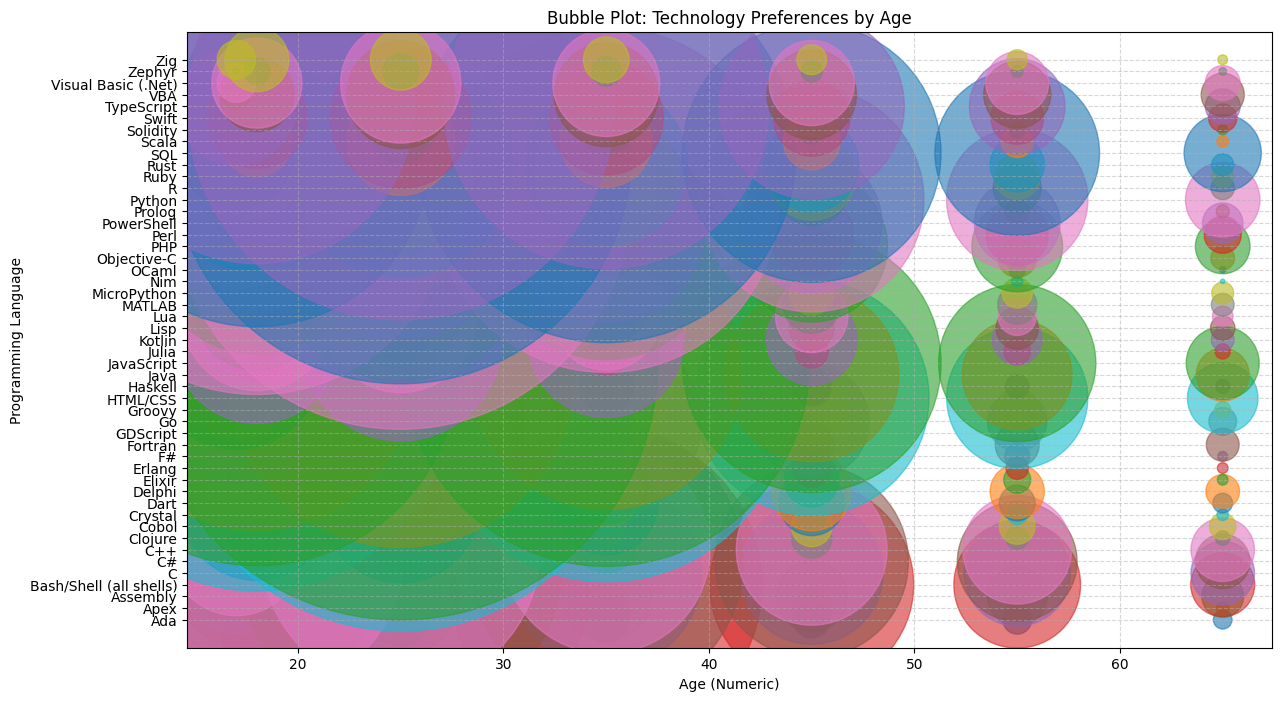

In [5]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query relevant columns
QUERY = """
SELECT LanguageHaveWorkedWith, Age
FROM main
WHERE LanguageHaveWorkedWith IS NOT NULL
  AND Age IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Close the connection
conn.close()

# Convert Age to numeric (lower bound of age ranges)
def age_to_numeric(age_str):
    try:
        if 'Under' in age_str:
            return 17
        elif 'or older' in age_str:
            return int(age_str.split()[0])
        elif '-' in age_str:
            return int(age_str.split('-')[0])
        else:
            return None
    except:
        return None

df['AgeNumeric'] = df['Age'].apply(age_to_numeric)
df = df.dropna(subset=['AgeNumeric'])

# Split multiple languages into separate rows
df = df.assign(Language=df['LanguageHaveWorkedWith'].str.split(';')).explode('Language')
df['Language'] = df['Language'].str.strip()

# Count frequency of each language by age
lang_age_freq = df.groupby(['Language', 'AgeNumeric']).size().reset_index(name='Frequency')

# Plot bubble chart
plt.figure(figsize=(14,8))
for lang in lang_age_freq['Language'].unique():
    subset = lang_age_freq[lang_age_freq['Language'] == lang]
    plt.scatter(
        subset['AgeNumeric'], 
        [lang]*len(subset),  # Place languages on y-axis
        s=subset['Frequency']*10,  # Bubble size proportional to frequency
        alpha=0.6
    )

plt.title("Bubble Plot: Technology Preferences by Age")
plt.xlabel("Age (Numeric)")
plt.ylabel("Programming Language")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


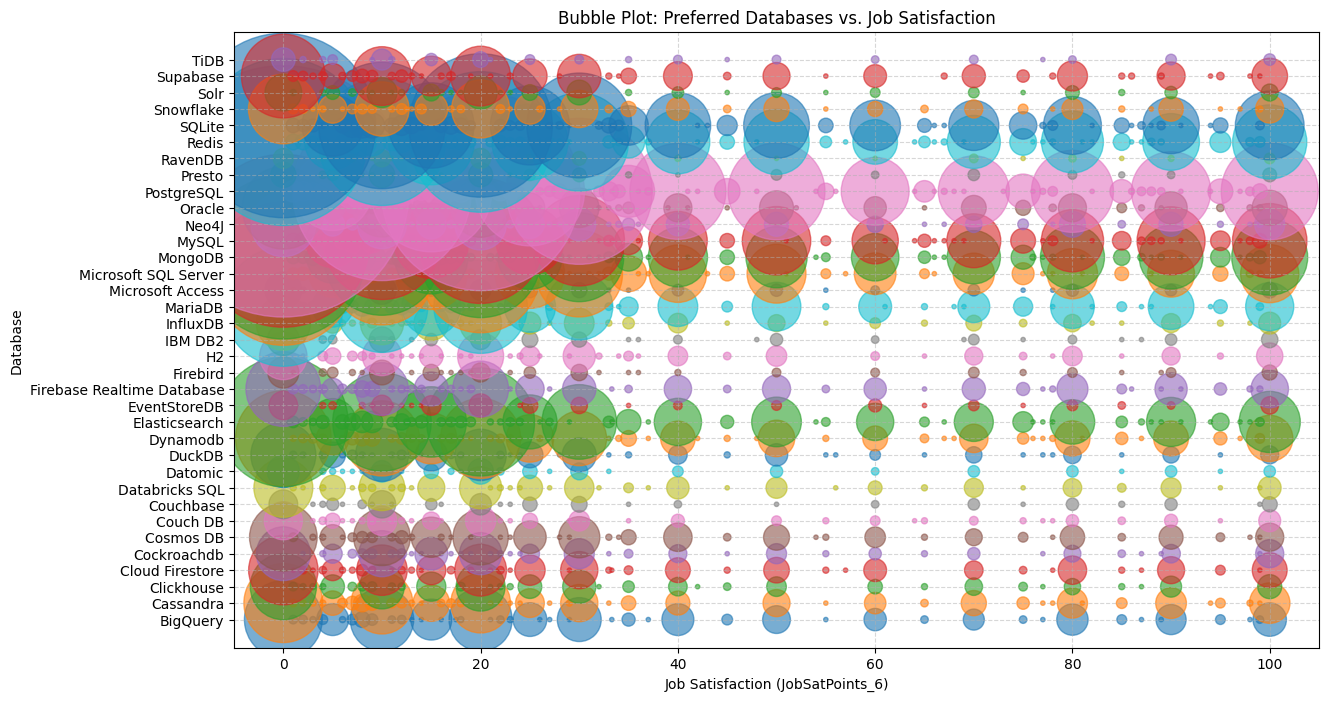

In [6]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query relevant columns
QUERY = """
SELECT DatabaseWantToWorkWith, JobSatPoints_6
FROM main
WHERE DatabaseWantToWorkWith IS NOT NULL
  AND JobSatPoints_6 IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Close the connection
conn.close()

# Split multiple databases into separate rows
df = df.assign(Database=df['DatabaseWantToWorkWith'].str.split(';')).explode('Database')
df['Database'] = df['Database'].str.strip()

# Count frequency of respondents for each database and JobSat
db_freq = df.groupby(['Database', 'JobSatPoints_6']).size().reset_index(name='Frequency')

# Plot bubble chart
plt.figure(figsize=(14,8))
for db in db_freq['Database'].unique():
    subset = db_freq[db_freq['Database'] == db]
    plt.scatter(
        subset['JobSatPoints_6'],  # X-axis: Job satisfaction
        [db]*len(subset),          # Y-axis: Database name
        s=subset['Frequency']*10,  # Bubble size proportional to frequency
        alpha=0.6
    )

plt.title("Bubble Plot: Preferred Databases vs. Job Satisfaction")
plt.xlabel("Job Satisfaction (JobSatPoints_6)")
plt.ylabel("Database")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


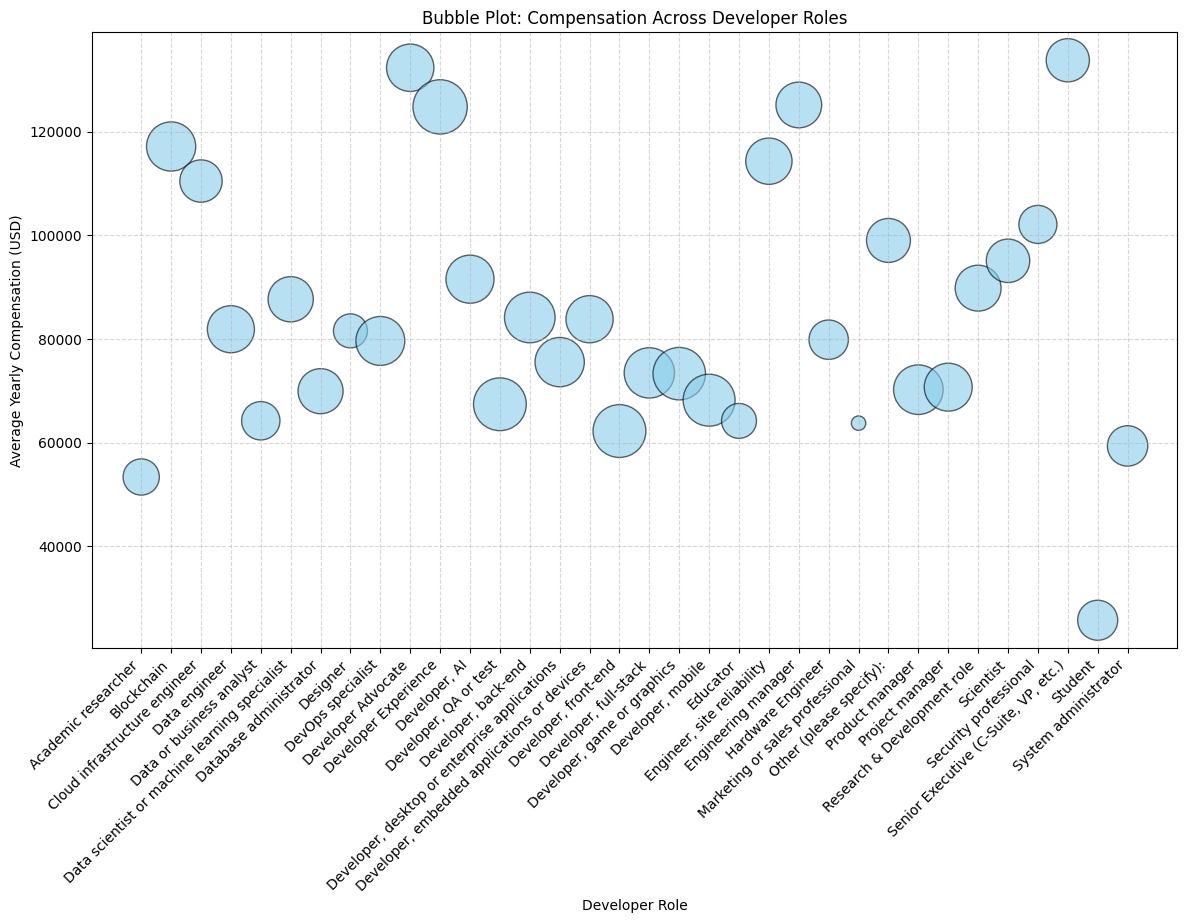

In [7]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query relevant columns
QUERY = """
SELECT DevType, ConvertedCompYearly, JobSatPoints_6
FROM main
WHERE DevType IS NOT NULL
  AND ConvertedCompYearly IS NOT NULL
  AND JobSatPoints_6 IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Close connection
conn.close()

# Split multiple developer types into separate rows
df = df.assign(DevType=df['DevType'].str.split(';')).explode('DevType')
df['DevType'] = df['DevType'].str.strip()

# Optional: Filter extreme compensation outliers
df = df[df['ConvertedCompYearly'] <= 500000]

# Aggregate: mean compensation and mean job satisfaction per DevType
agg_df = df.groupby('DevType').agg({
    'ConvertedCompYearly': 'mean',
    'JobSatPoints_6': 'mean'
}).reset_index()

# Plot bubble chart
plt.figure(figsize=(14,8))
plt.scatter(
    agg_df['DevType'],                # X-axis: Developer roles
    agg_df['ConvertedCompYearly'],    # Y-axis: Average compensation
    s=agg_df['JobSatPoints_6']*50,    # Bubble size proportional to JobSat
    alpha=0.6,
    color='skyblue',
    edgecolor='black'
)

plt.title("Bubble Plot: Compensation Across Developer Roles")
plt.xlabel("Developer Role")
plt.ylabel("Average Yearly Compensation (USD)")
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


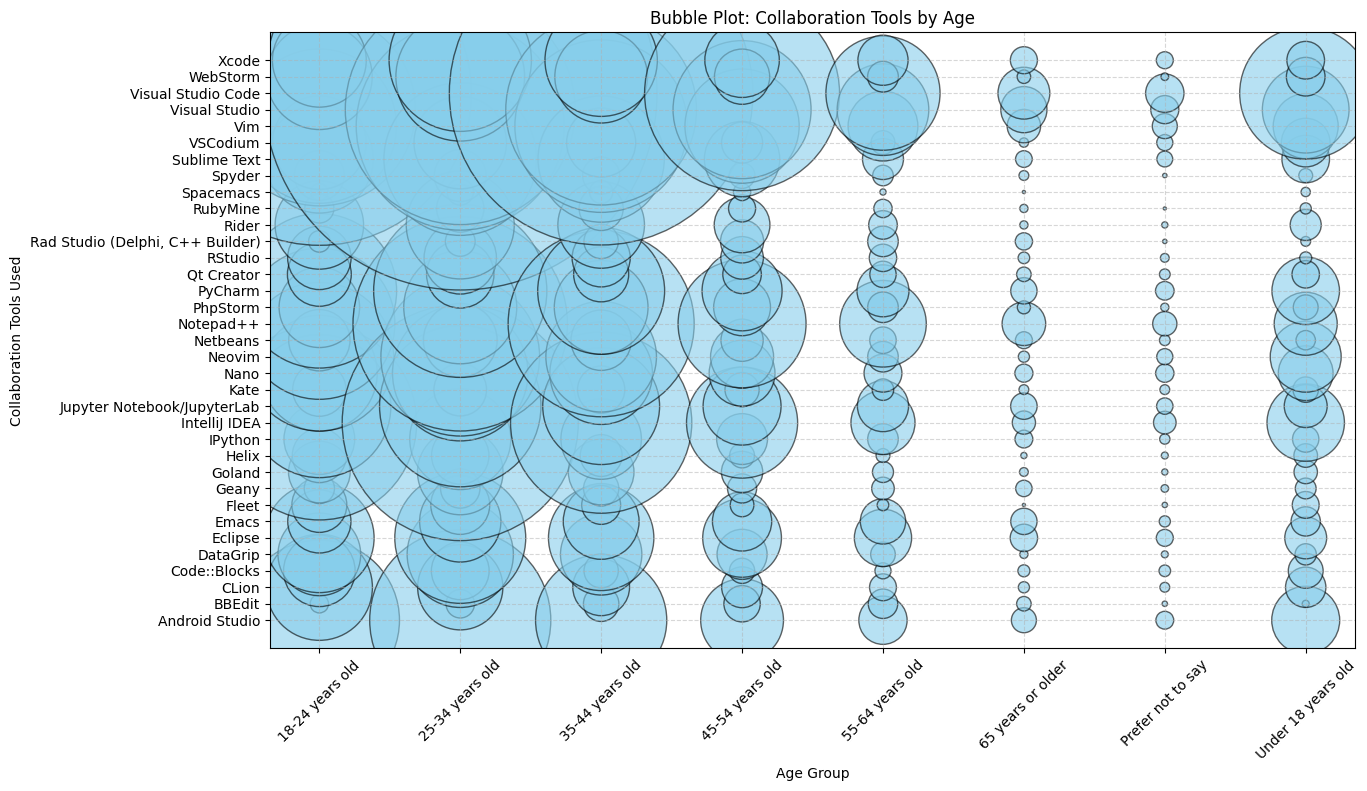

In [8]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query relevant columns
QUERY = """
SELECT Age, NEWCollabToolsHaveWorkedWith
FROM main
WHERE Age IS NOT NULL
  AND NEWCollabToolsHaveWorkedWith IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Close connection
conn.close()

# Split multiple tools into separate rows
df = df.assign(NEWCollabToolsHaveWorkedWith=df['NEWCollabToolsHaveWorkedWith'].str.split(';')).explode('NEWCollabToolsHaveWorkedWith')
df['NEWCollabToolsHaveWorkedWith'] = df['NEWCollabToolsHaveWorkedWith'].str.strip()

# Aggregate frequency of each tool by age group
agg_df = df.groupby(['Age', 'NEWCollabToolsHaveWorkedWith']).size().reset_index(name='Frequency')

# Plot bubble chart
plt.figure(figsize=(14,8))
scatter = plt.scatter(
    x=agg_df['Age'], 
    y=agg_df['NEWCollabToolsHaveWorkedWith'], 
    s=agg_df['Frequency']*5,   # Bubble size proportional to frequency
    alpha=0.6,
    color='skyblue',
    edgecolor='black'
)

plt.title("Bubble Plot: Collaboration Tools by Age")
plt.xlabel("Age Group")
plt.ylabel("Collaboration Tools Used")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



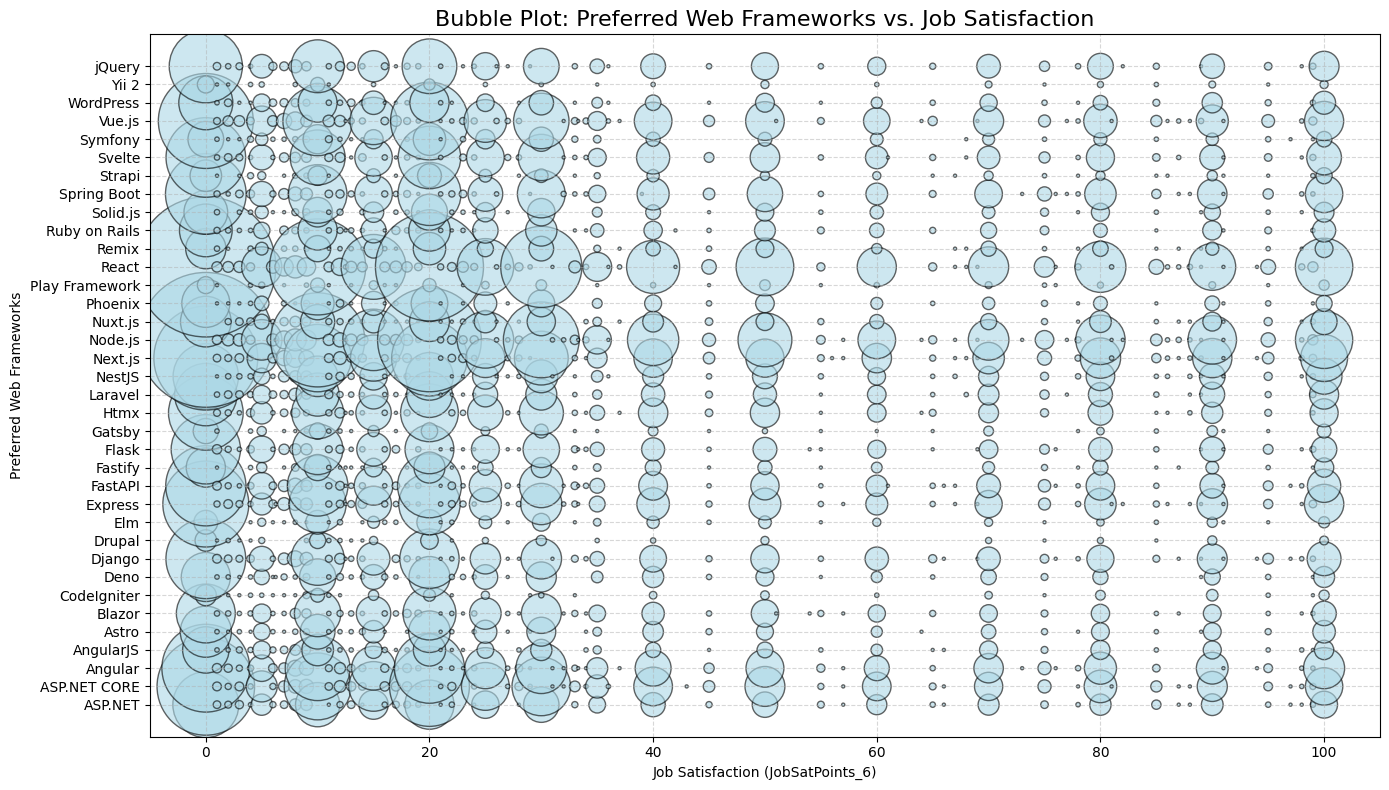

In [9]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Step 1: Query relevant columns
QUERY = """
SELECT JobSatPoints_6, WebframeWantToWorkWith
FROM main
WHERE JobSatPoints_6 IS NOT NULL
  AND WebframeWantToWorkWith IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Step 2: Close the connection
conn.close()

# Step 3: Split multiple frameworks into separate rows
df = df.assign(WebframeWantToWorkWith=df['WebframeWantToWorkWith'].str.split(';')).explode('WebframeWantToWorkWith')
df['WebframeWantToWorkWith'] = df['WebframeWantToWorkWith'].str.strip()  # Remove extra spaces

# Step 4: Aggregate frequency of each framework by job satisfaction
agg_df = df.groupby(['JobSatPoints_6', 'WebframeWantToWorkWith']).size().reset_index(name='Frequency')

# Step 5: Create bubble plot
plt.figure(figsize=(14,8))
plt.scatter(
    x=agg_df['JobSatPoints_6'], 
    y=agg_df['WebframeWantToWorkWith'], 
    s=agg_df['Frequency']*5,  # Bubble size proportional to frequency
    alpha=0.6,
    color='lightblue',
    edgecolor='black'
)

# Step 6: Add labels and title
plt.title("Bubble Plot: Preferred Web Frameworks vs. Job Satisfaction", fontsize=16)
plt.xlabel("Job Satisfaction (JobSatPoints_6)")
plt.ylabel("Preferred Web Frameworks")
plt.grid(True, linestyle='--', alpha=0.5)

# Step 7: Show plot
plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



In [ ]:
##Write your code here

## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
